In [46]:
import pandas as pd
import os
import numpy as np
# os.chdir('../data/processed')

education_data=pd.read_csv('education_data.csv', encoding='latin-1',sep=';')
GDP_data=pd.read_csv('GDP_data.csv', encoding='latin-1',sep=';')
health_data=pd.read_csv('health_data.csv', encoding='latin-1',sep=';')
HPI_data=pd.read_csv('HPI_data.csv', encoding='latin-1',sep=';')
income_data=pd.read_csv('income_data.csv', encoding='latin-1',sep=';')
MigrationData=pd.read_csv('MigrationData.csv', encoding='latin-1',sep=';')
population=pd.read_csv('population_20-22_data.csv', encoding='latin-1',sep=';')
unemployment_data=pd.read_csv('unemployment_data.csv', encoding='latin-1',sep=';')

In [2]:
part1=pd.merge(education_data, GDP_data, on='FIPS code', suffixes=('','_y'))
part2=pd.merge(part1, health_data, on='FIPS code', suffixes=('','_y'))
part3=pd.merge(part2, HPI_data, on='FIPS code', suffixes=('','_y'))
part4=pd.merge(part3, income_data, on='FIPS code', suffixes=('','_y'))
part5=pd.merge(part4, population, on='FIPS code', suffixes=('','_y'))
part6=pd.merge(part5, unemployment_data, on='FIPS code', suffixes=('','_y'))

# part5=pd.merge(part4, MigrationData, on='FIPS code', suffixes=('','_y'))

part6.drop(part6.filter(regex='_y$').columns, axis=1, inplace=True)

In [3]:
part6.shape

(2716, 601)

In [4]:
# part6.to_csv('Total1.csv', index=False)

In [5]:
# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_columns", None)
# pd.set_option("display.width", None)

In [6]:
part4.head(10)

,FIPS code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,2012 Population (persons) 1/.1,2013 Population (persons) 1/.1,2014 Population (persons) 1/.1,2015 Population (persons) 1/.1,2016 Population (persons) 1/.1,2017 Population (persons) 1/.1,2018 Population (persons) 1/.1,2019 Population (persons) 1/.1,2020 Population (persons) 1/.1,2021 Population (persons) 1/.1
0,1001,Alabama,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,55558,55594,56034,56278,56954,57371,57728,58245,58877,59095
1,1003,Alabama,Baldwin County,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,...,190941,196067,200759,204925,210004,215365,221132,227079,233140,239294
2,1005,Alabama,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,...,27320,27158,27043,26633,26217,25608,25380,25205,25180,24964
3,1007,Alabama,Bibb County,1.0,1.0,1.0,1.0,5272.0,1402.0,238.0,...,22682,22544,22586,22607,22654,22606,22383,22405,22223,22477
4,1009,Alabama,Blount County,1.0,1.0,1.0,1.0,10677.0,3440.0,626.0,...,57857,58024,58048,58168,58238,58676,58765,58956,59081,59041
5,1013,Alabama,Butler County,6.0,6.0,6.0,6.0,8353.0,2459.0,499.0,...,20568,20212,20139,19932,19760,19588,19312,19097,19045,18884
6,1015,Alabama,Calhoun County,3.0,2.0,3.0,2.0,30535.0,13804.0,3823.0,...,117880,117465,117209,117048,116810,116796,116622,116669,116266,115972
7,1017,Alabama,Chambers County,6.0,5.0,6.0,5.0,13616.0,4816.0,927.0,...,34499,34721,34740,34953,34881,35038,35071,34914,34678,34541
8,1019,Alabama,Cherokee County,8.0,6.0,6.0,6.0,6126.0,1878.0,440.0,...,25671,25602,25355,25071,24973,24899,24978,25061,24958,24996
9,1021,Alabama,Chilton County,1.0,1.0,1.0,1.0,10285.0,2805.0,538.0,...,43715,43823,44021,44026,44251,44546,44608,44902,45024,45274


In [7]:
import re

# wyciagamy z nazw kolumn wszystkie daty
def extract_year(column_name):
    year_matches = re.findall(r'\d{4}', column_name)
    for year in year_matches:
        if int(year) >= 1900 and int(year) <= 2023:
            return year


In [8]:
years=[]
for col in part6.columns:
    years.append(extract_year(col))

In [9]:
years.sort

<function list.sort(*, key=None, reverse=False)>

In [10]:
# zbior wyciagnietych lat
years=set(years)
years

{'1970',
 '1980',
 '1990',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 None}

In [11]:
columns = part6.columns.tolist()


In [12]:
import re

# sortujemy kolumny zgodnie z naszymi latami
def extract_year(col):
    match = re.search(r"\d{4}", col)
    if match:
        return int(match.group())
    else:
        return -1

columns = part6.columns.tolist()
columns.sort(key=extract_year)
part6 = part6[columns]


In [13]:
part6.head(10)

,FIPS code,State,Area name,GeoName,State FIPS Code,County FIPS Code,State Abbreviation,Name,State FIPS Code.1,County FIPS Code.1,...,2021 Population (persons) 1/.1,POPESTIMATE2021,NPOPCHG2021,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,2022 HPI Change,POPESTIMATE2022,NPOPCHG2022
0,1001,Alabama,Autauga County,Autauga County,1.0,1.0,Alabama,Autauga County,1.0,1.0,...,59095,59210,308,26341.0,25599.0,742.0,2.8,12.95,59759,549
1,1003,Alabama,Baldwin County,Baldwin County,1.0,3.0,Alabama,Baldwin County,1.0,3.0,...,239294,239361,6142,99427.0,96481.0,2946.0,3.0,16.41,246435,7074
2,1005,Alabama,Barbour County,Barbour County,1.0,5.0,Alabama,Barbour County,1.0,5.0,...,24964,24539,-421,8197.0,7728.0,469.0,5.7,16.31,24706,167
3,1007,Alabama,Bibb County,Bibb County,1.0,7.0,Alabama,Bibb County,1.0,7.0,...,22477,22370,187,8560.0,8262.0,298.0,3.5,13.74,22005,-365
4,1009,Alabama,Blount County,Blount County,1.0,9.0,Alabama,Blount County,1.0,9.0,...,59041,59085,-17,25127.0,24529.0,598.0,2.4,17.33,59512,427
5,1013,Alabama,Butler County,Butler County,1.0,13.0,Alabama,Butler County,1.0,13.0,...,18884,18855,-176,8796.0,8328.0,468.0,5.3,17.73,18650,-205
6,1015,Alabama,Calhoun County,Calhoun County,1.0,15.0,Alabama,Calhoun County,1.0,15.0,...,115972,115677,-562,46118.0,44212.0,1906.0,4.1,16.20,115788,111
7,1017,Alabama,Chambers County,Chambers County,1.0,17.0,Alabama,Chambers County,1.0,17.0,...,34541,34446,-199,15752.0,15173.0,579.0,3.7,15.35,34088,-358
8,1019,Alabama,Cherokee County,Cherokee County,1.0,19.0,Alabama,Cherokee County,1.0,19.0,...,24996,25026,54,11808.0,11512.0,296.0,2.5,20.91,25302,276
9,1021,Alabama,Chilton County,Chilton County,1.0,21.0,Alabama,Chilton County,1.0,21.0,...,45274,45259,208,19811.0,19246.0,565.0,2.9,14.10,45884,625


In [14]:
# usuwamy zbedne kolumny
# df=part6.drop(['GeoName', 'State FIPS Code', 'County FIPS Code', 'State Abbreviation', 'Name', 'State FIPS Code.1', 'County FIPS Code.1', 'FIPS code.1', 'State Abbreviation.1', 'Name.1', 'State FIPS Code.2', 'County FIPS Code.2', 'FIPS code.2', 'State Abbreviation.2'],axis=1)
df = part6.drop(part6.iloc[:, 3:32], axis=1)
df = df.rename(columns={'Area name': 'County'})
df

,FIPS code,State,County,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970",...,2021 Population (persons) 1/.1,POPESTIMATE2021,NPOPCHG2021,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,2022 HPI Change,POPESTIMATE2022,NPOPCHG2022
0,1001,Alabama,Autauga County,6611.0,3757.0,933.0,767.0,54.8,31.1,7.7,...,59095,59210,308,26341.0,25599.0,742.0,2.8,12.95,59759,549
1,1003,Alabama,Baldwin County,18726.0,8426.0,2334.0,2038.0,59.4,26.7,7.4,...,239294,239361,6142,99427.0,96481.0,2946.0,3.0,16.41,246435,7074
2,1005,Alabama,Barbour County,8120.0,2242.0,581.0,861.0,68.8,19.0,4.9,...,24964,24539,-421,8197.0,7728.0,469.0,5.7,16.31,24706,167
3,1007,Alabama,Bibb County,5272.0,1402.0,238.0,302.0,73.1,19.4,3.3,...,22477,22370,187,8560.0,8262.0,298.0,3.5,13.74,22005,-365
4,1009,Alabama,Blount County,10677.0,3440.0,626.0,404.0,70.5,22.7,4.1,...,59041,59085,-17,25127.0,24529.0,598.0,2.4,17.33,59512,427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,56037,Wyoming,Sweetwater County,4393.0,3731.0,986.0,960.0,43.6,37.1,9.8,...,41614,41582,-608,19449.0,18360.0,1089.0,5.6,9.43,41345,-237
2712,56039,Wyoming,Teton County,708.0,908.0,524.0,455.0,27.3,35.0,20.2,...,23575,23622,245,15886.0,15375.0,511.0,3.2,6.64,23287,-335
2713,56041,Wyoming,Uinta County,1569.0,1517.0,445.0,352.0,40.4,39.1,11.5,...,20635,20655,198,8832.0,8389.0,443.0,5.0,19.45,20712,57
2714,56043,Wyoming,Washakie County,1572.0,1437.0,590.0,432.0,39.0,35.6,14.6,...,7705,7712,54,3978.0,3819.0,159.0,4.0,14.82,7719,7


In [15]:
df.describe()

,FIPS code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980",...,2021 Population (persons) 1/.1,POPESTIMATE2021,NPOPCHG2021,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,2022 HPI Change,POPESTIMATE2022,NPOPCHG2022
count,2716.000000,2.716000e+03,2.716000e+03,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2.716000e+03,...,2.716000e+03,2.716000e+03,2716.00000,2.716000e+03,2.716000e+03,2716.000000,2716.000000,2681.000000,2.716000e+03,2716.000000
mean,29762.901325,1.873817e+04,1.229791e+04,4181.494477,4190.269146,54.742010,28.918409,8.915206,7.424632,1.591419e+04,...,1.190878e+05,1.190177e+05,190.65243,5.801427e+04,5.490402e+04,3110.244845,4.633211,15.431298,1.194772e+05,459.529455
std,14914.158812,6.104120e+04,4.298971e+04,17790.193900,16953.920998,12.531555,7.911536,3.556404,3.914249,4.807606e+04,...,3.549166e+05,3.545742e+05,5935.39253,1.783091e+05,1.662521e+05,12614.913110,1.577742,6.038971,3.541010e+05,4307.561423
min,1001.000000,4.100000e+01,3.600000e+01,0.000000,7.000000,11.800000,7.800000,0.000000,1.300000,3.500000e+01,...,7.330000e+02,7.400000e+02,-180394.00000,4.500000e+02,4.340000e+02,16.000000,1.400000,-10.990000,7.750000e+02,-90704.000000
25%,18118.500000,3.715000e+03,1.628750e+03,468.000000,348.750000,45.300000,22.600000,6.200000,4.900000,3.277500e+03,...,1.475475e+04,1.472350e+04,-103.00000,6.521250e+03,6.245000e+03,283.750000,3.500000,12.000000,1.475975e+04,-117.000000
50%,29028.000000,6.773500e+03,3.273500e+03,942.500000,714.500000,53.400000,30.000000,8.500000,6.500000,6.263500e+03,...,3.128100e+04,3.136850e+04,44.00000,1.439150e+04,1.370850e+04,636.500000,4.400000,15.240000,3.148100e+04,37.000000
75%,42071.500000,1.314050e+04,7.759250e+03,2388.500000,2031.750000,65.000000,35.300000,11.200000,8.825000,1.235300e+04,...,8.292900e+04,8.288325e+04,396.75000,3.812700e+04,3.656025e+04,1812.000000,5.500000,19.030000,8.307600e+04,371.250000
max,56045.000000,1.506170e+06,1.294477e+06,655534.000000,504563.000000,86.400000,47.900000,28.000000,38.600000,1.336041e+06,...,9.829544e+06,9.811842e+06,54461.00000,4.994057e+06,4.548852e+06,445205.000000,17.300000,53.480000,9.721138e+06,56831.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2716 entries, 0 to 2715
Columns: 572 entries, FIPS code to NPOPCHG2022
dtypes: float64(500), int64(70), object(2)
memory usage: 11.9+ MB


In [17]:
# liczba pustych komorek
nulls = df.isnull().sum()
nulls = nulls[nulls != 0]
nulls = nulls.sort_values(ascending=False)
nulls


2001 HPI Change                           362
Mental health providers raw value 2017    217
Mental health providers raw value 2018    201
2002 HPI Change                           198
Mental health providers raw value 2019    191
                                         ... 
Children in poverty raw value 2019          1
Insufficient sleep raw value 2019           1
Food insecurity raw value 2019              1
Median household income raw value 2019      1
% below 18 years of age raw value 2018      1
Length: 263, dtype: int64

In [18]:
# wypelniamy puste wartosci srednimi
for n in nulls.index:
    df[n] = df[n].fillna(df[n].mean())

In [19]:
df.describe()

,FIPS code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980",...,2021 Population (persons) 1/.1,POPESTIMATE2021,NPOPCHG2021,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,2022 HPI Change,POPESTIMATE2022,NPOPCHG2022
count,2716.000000,2.716000e+03,2.716000e+03,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2716.000000,2.716000e+03,...,2.716000e+03,2.716000e+03,2716.00000,2.716000e+03,2.716000e+03,2716.000000,2716.000000,2716.000000,2.716000e+03,2716.000000
mean,29762.901325,1.873817e+04,1.229791e+04,4181.494477,4190.269146,54.742010,28.918409,8.915206,7.424632,1.591419e+04,...,1.190878e+05,1.190177e+05,190.65243,5.801427e+04,5.490402e+04,3110.244845,4.633211,15.431298,1.194772e+05,459.529455
std,14914.158812,6.104120e+04,4.298971e+04,17790.193900,16953.920998,12.531555,7.911536,3.556404,3.914249,4.807606e+04,...,3.549166e+05,3.545742e+05,5935.39253,1.783091e+05,1.662521e+05,12614.913110,1.577742,5.999919,3.541010e+05,4307.561423
min,1001.000000,4.100000e+01,3.600000e+01,0.000000,7.000000,11.800000,7.800000,0.000000,1.300000,3.500000e+01,...,7.330000e+02,7.400000e+02,-180394.00000,4.500000e+02,4.340000e+02,16.000000,1.400000,-10.990000,7.750000e+02,-90704.000000
25%,18118.500000,3.715000e+03,1.628750e+03,468.000000,348.750000,45.300000,22.600000,6.200000,4.900000,3.277500e+03,...,1.475475e+04,1.472350e+04,-103.00000,6.521250e+03,6.245000e+03,283.750000,3.500000,12.060000,1.475975e+04,-117.000000
50%,29028.000000,6.773500e+03,3.273500e+03,942.500000,714.500000,53.400000,30.000000,8.500000,6.500000,6.263500e+03,...,3.128100e+04,3.136850e+04,44.00000,1.439150e+04,1.370850e+04,636.500000,4.400000,15.310000,3.148100e+04,37.000000
75%,42071.500000,1.314050e+04,7.759250e+03,2388.500000,2031.750000,65.000000,35.300000,11.200000,8.825000,1.235300e+04,...,8.292900e+04,8.288325e+04,396.75000,3.812700e+04,3.656025e+04,1812.000000,5.500000,18.970000,8.307600e+04,371.250000
max,56045.000000,1.506170e+06,1.294477e+06,655534.000000,504563.000000,86.400000,47.900000,28.000000,38.600000,1.336041e+06,...,9.829544e+06,9.811842e+06,54461.00000,4.994057e+06,4.548852e+06,445205.000000,17.300000,53.480000,9.721138e+06,56831.000000


In [20]:
nulls = df.isnull().sum()
nulls = nulls[nulls != 0]
nulls = nulls.sort_values(ascending=False)
nulls

Series([], dtype: int64)

In [233]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

columns_from_year = [element for element in df.columns if '2016' in element]
columns_from_year_2017 = [element for element in df.columns if '2017' in element]
columns_from_year_2018 = [element for element in df.columns if '2018' in element]
columns_from_year_2019 = [element for element in df.columns if '2019' in element]
columns_from_year_2020 = [element for element in df.columns if '2020' in element]

columns_from_year.extend(columns_from_year_2017)
columns_from_year.extend(columns_from_year_2018)
columns_from_year.extend(columns_from_year_2019)
columns_from_year.extend(columns_from_year_2020)
len(columns_from_year)


337

In [234]:
# # print(df[columns_from_year].corr())
  
# # plotting correlation heatmap\
# %matplotlib inline

# plt.figure(figsize=(40 ,40))
# sns.heatmap(df[columns_from_year].corr(),cmap="YlGnBu", annot=True, fmt='.2f')
# plt.show()

In [235]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data_2016 = df[columns_from_year]

# pca2016 = KernelPCA(kernel='rbf')
tsne2016 = PCA()
scaler2016 = StandardScaler()
scaled_data_2016 = scaler2016.fit_transform(data_2016)


pcaed_data = tsne2016.fit_transform(scaled_data_2016)


In [236]:
%matplotlib qt
plt.figure(figsize=(10, 10))
sns.scatterplot(x=pcaed_data[:, 0], y=pcaed_data[:, 1], hue=np.array(df['NPOPCHG2022'] > 0))
plt.show()


In [212]:
StandardScaler().fit_transform(np.array(df['NPOPCHG2022']).reshape(-1, 1)).reshape(-1).max()

13.089041697103816

In [237]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dzewo = DecisionTreeRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(data_2016, df['NPOPCHG2022'], test_size=.3)

dzewo.fit(X_train, Y_train)

DecisionTreeRegressor()

In [238]:
preds = dzewo.predict(X_test)

In [239]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

mean_absolute_error(Y_test, preds)

1014.3055214723927

In [240]:
krowa = pd.DataFrame(dict(zip(Y_test.values, preds)).items(), columns=['True', 'Preds'])

In [241]:
from sklearn.ensemble import RandomForestClassifier
inne_dzewo = RandomForestClassifier(n_estimators=200, max_depth=20)
X_train, X_test, Y_train, Y_test = train_test_split(data_2016, df['NPOPCHG2022'] > 0, test_size=.3, stratify=df['NPOPCHG2022'] > 0)

inne_dzewo.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, n_estimators=200)

In [242]:
preds = inne_dzewo.predict(X_test)

In [243]:
accuracy_score(Y_test, preds)

0.7533742331288343

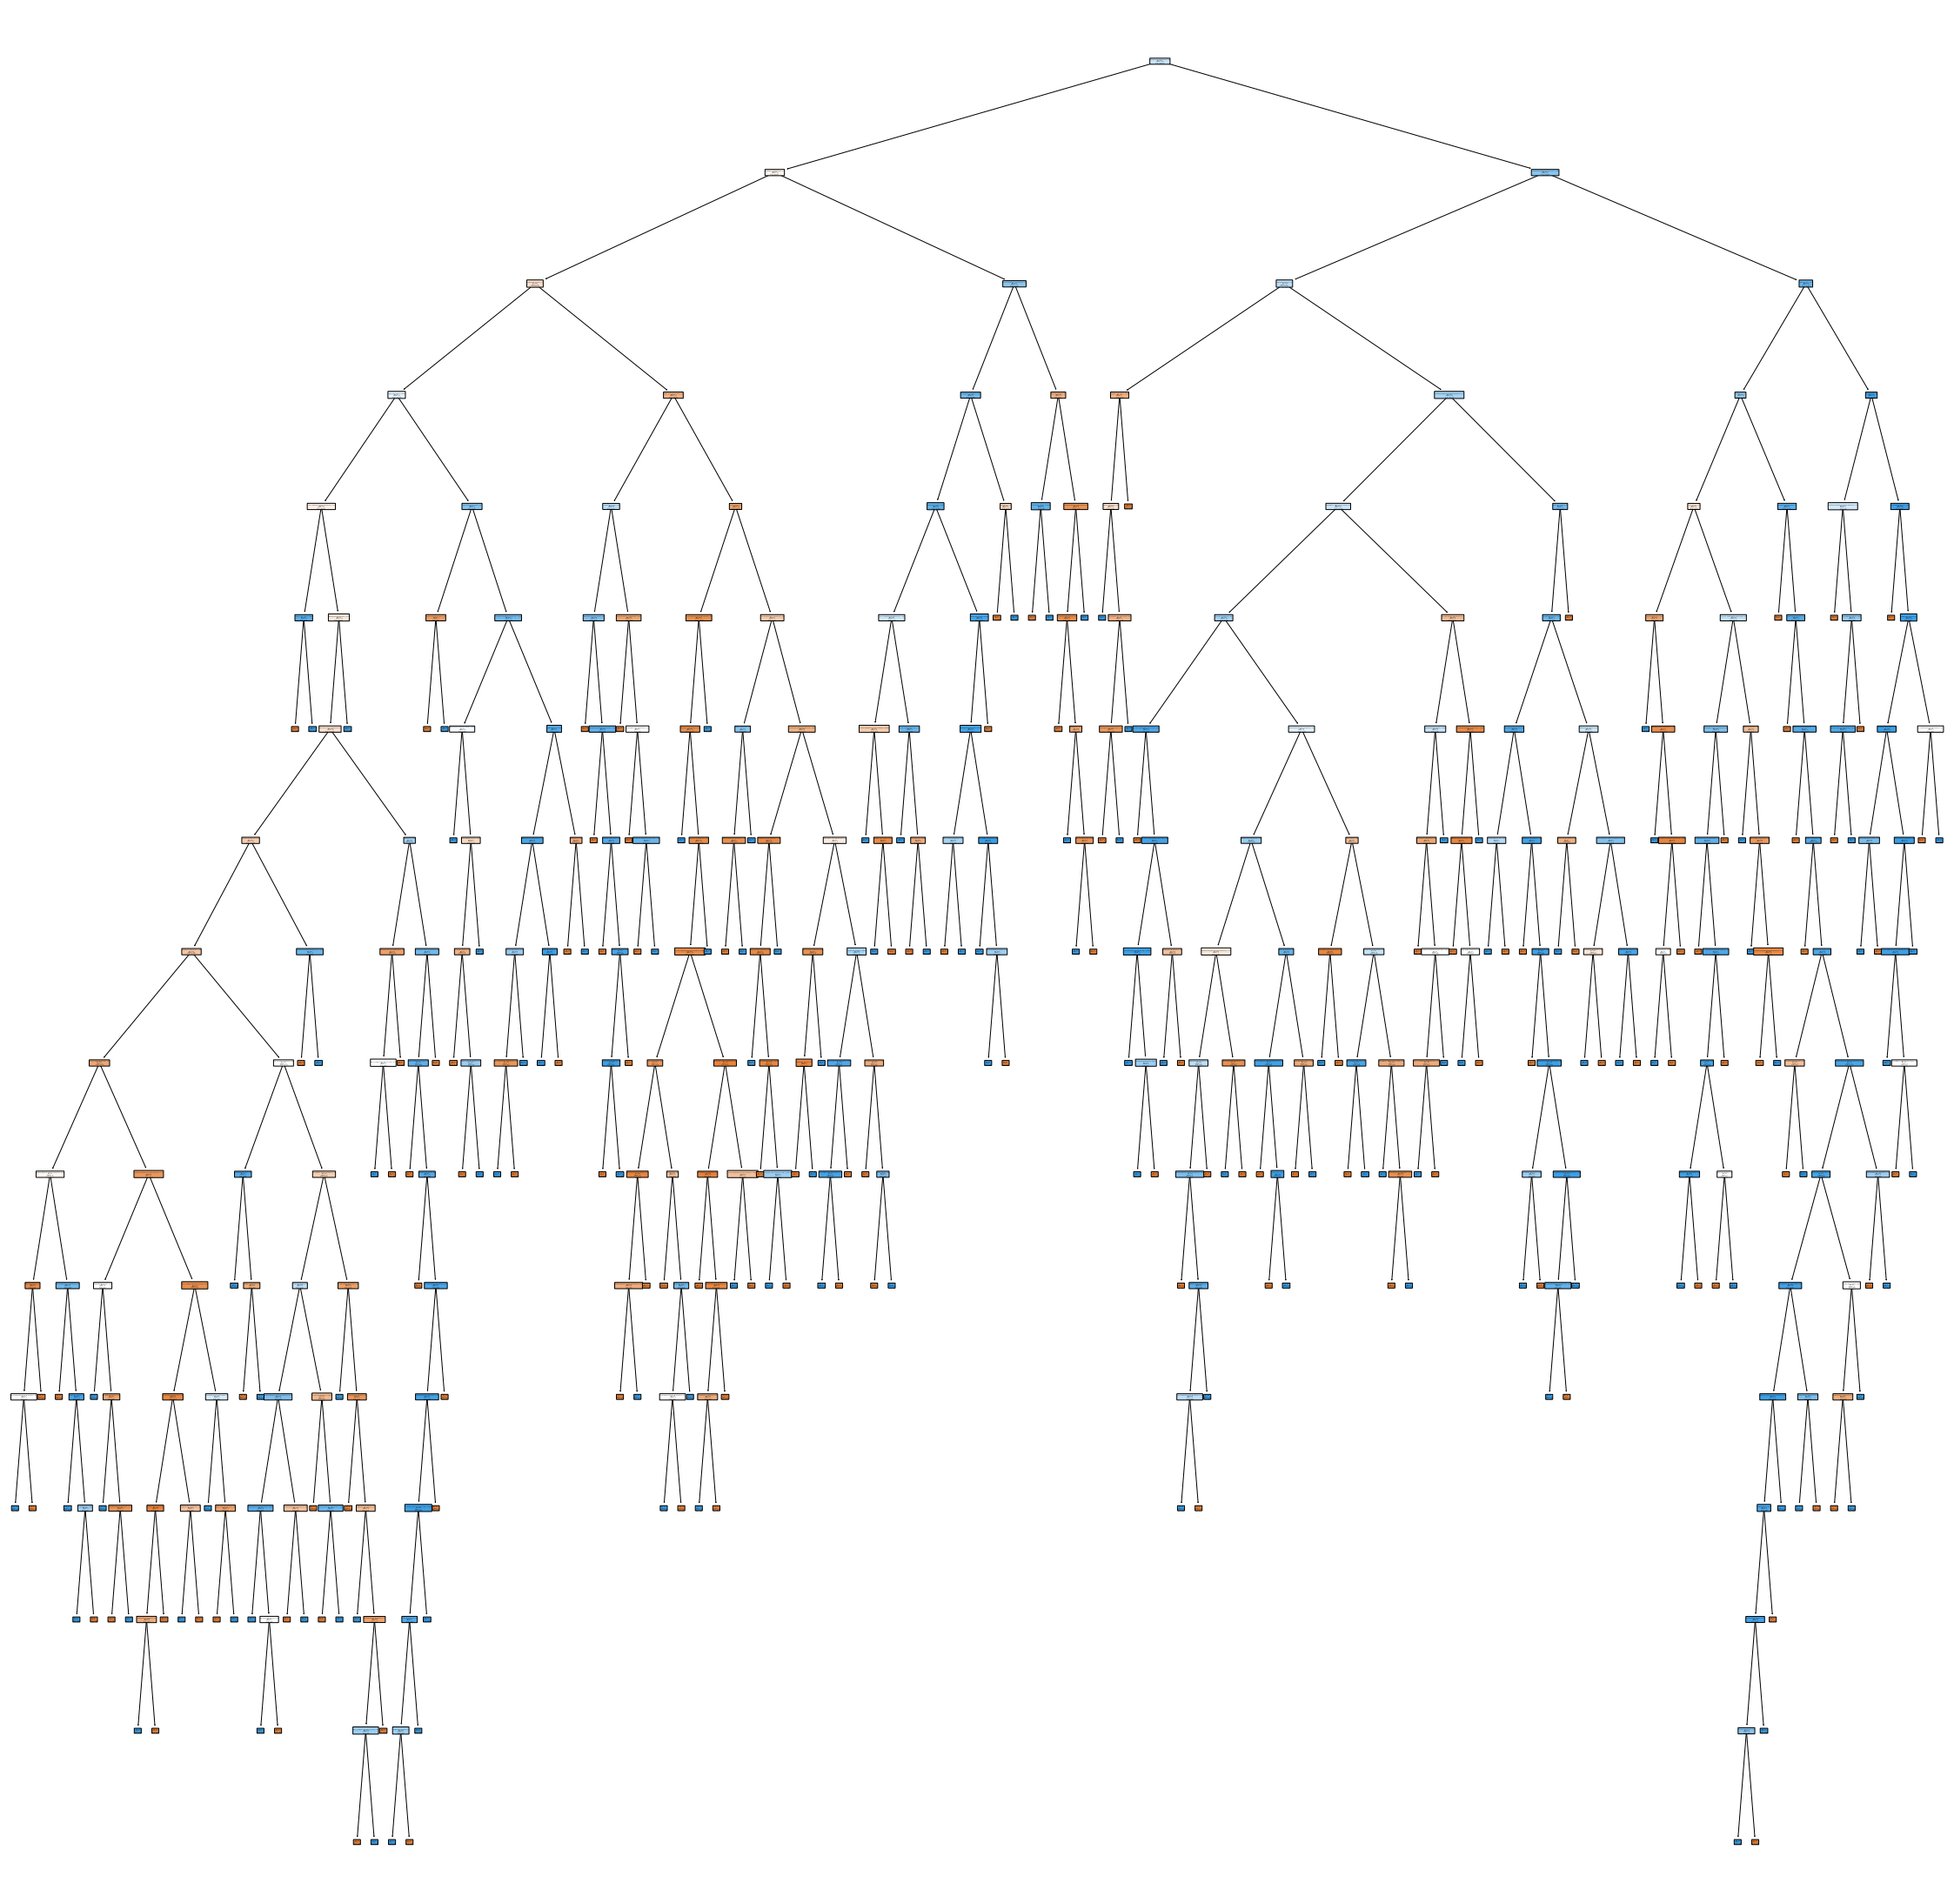

In [232]:
from sklearn.tree import plot_tree
# Export as dot file

estimation = inne_dzewo.estimators_[0]
%matplotlib inline
plt.figure(figsize=(40, 40))
plot_tree(estimation,
                feature_names = data_2016.columns,
                class_names = ['True', 'False'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

plt.savefig('xd.pdf')